# Advertising Sales Channel Prediction

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Here we read the CSV file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Here we are loading the dataswt into DataDrame.

In [4]:
df.sample(10)

,Unnamed: 0,TV,radio,newspaper,sales
107,108,90.4,0.3,23.2,8.7
160,161,172.5,18.1,30.7,14.4
76,77,27.5,1.6,20.7,6.9
82,83,75.3,20.3,32.5,11.3
38,39,43.1,26.7,35.1,10.1
97,98,184.9,21.0,22.0,15.5
90,91,134.3,4.9,9.3,11.2
57,58,136.2,19.2,16.6,13.2
169,170,284.3,10.6,6.4,15.0
13,14,97.5,7.6,7.2,9.7


Displaying 10 random samples of data to understand it more.

# Data Inspection

In [5]:
df.shape

(200, 5)

There are 200 rows and 5 columns in our dataset.

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

The dataset is of only float datatype. The unnamed column is the serial number.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There are 5 columns and no columns have null values and 4 columns are of float data type , where as the index/serial number (Unnamed:0) is of integer data type.

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Here sales is our target variable.

# Data Cleaning

In [9]:
#Checking for Null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no missing values present in the dataset.

<AxesSubplot:>

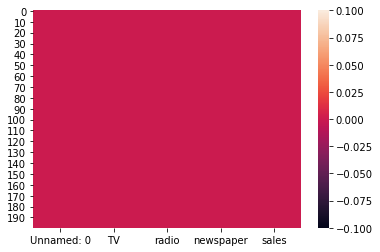

In [10]:
sn.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

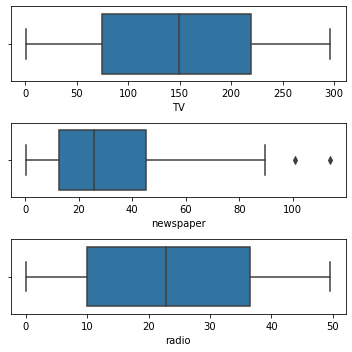

In [11]:
#Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sn.boxplot(df['TV'], ax = axs[0])
plt2 = sn.boxplot(df['newspaper'], ax = axs[1])
plt3 = sn.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are few ouliers in column 'newspaper'. Let's print them.

In [12]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


There are no considerable outliers in the dataset. Hence it's not necessary to remove them. 

In [13]:
dfnew=df[(dfzscore<3).all(axis=1)]
df=dfnew
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


We have removed the outliers and lost 2 rows. 

In [14]:
(198/200)*100

99.0

There is 1% data loss after removing the outliers which is in considerable range. 

In [15]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

There is no considerable Skewness exists in the data. 

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='sales'>

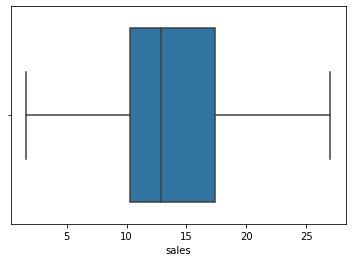

In [16]:
sn.boxplot(df['sales'])

The sales is our target variable . And it is very tightly distributed. As well as it has no outliers.

<AxesSubplot:xlabel='sales', ylabel='Density'>

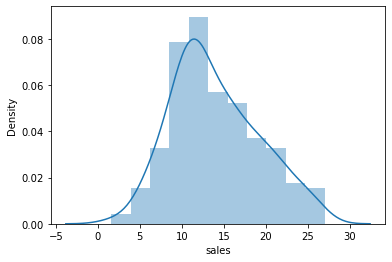

In [17]:
sn.distplot(df['sales'])

Our target variable, 'sales' is almost normally distributed.

<AxesSubplot:xlabel='TV', ylabel='Density'>

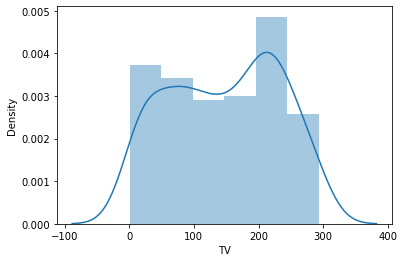

In [18]:
sn.distplot(df['TV'])

The data of 'TV' is not normalized.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

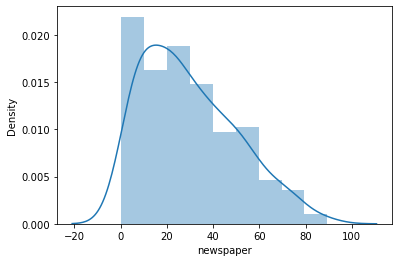

In [19]:
sn.distplot(df['newspaper'])

This column 'newspaper' is right-skewed.

<AxesSubplot:xlabel='radio', ylabel='Density'>

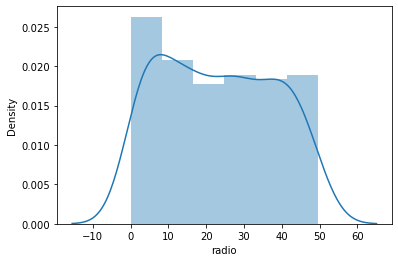

In [20]:
sn.distplot(df['radio'])

This is also not normalized data.

# Bivariate Analysis

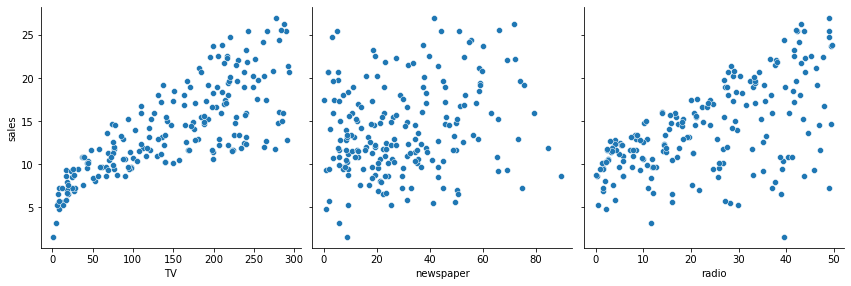

In [21]:
sn.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')

TV has a very scattered data , means greater range of sales, followed by radio and lastly the newspaper. 

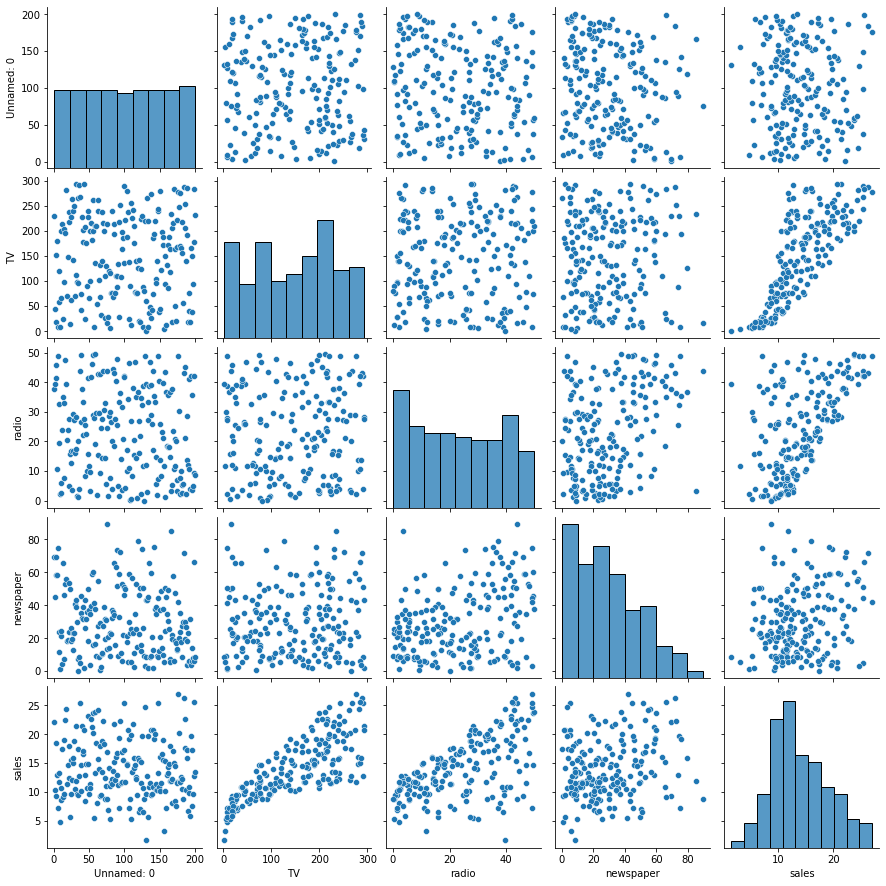

In [22]:
sn.pairplot(df)

Pairplot gives the graph of each column with every another column and itself as well.

# Multivariate Analysis

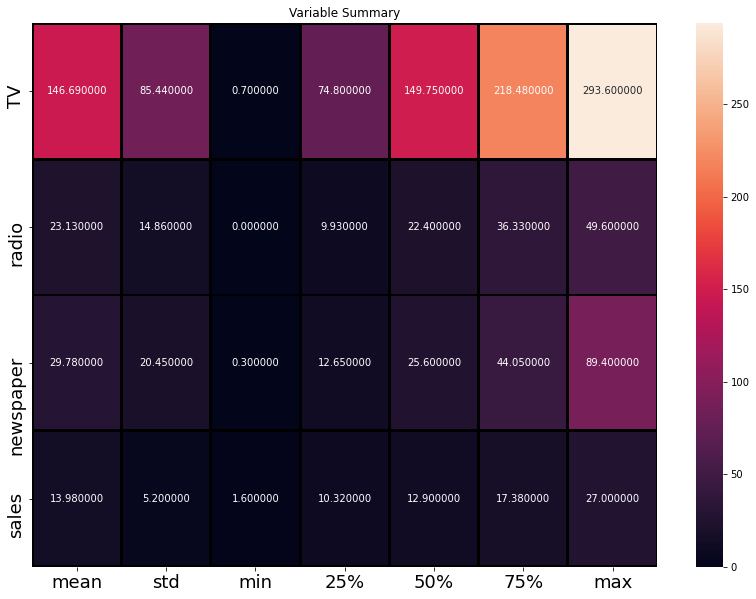

In [23]:
plt.figure(figsize=(14,10))
sn.heatmap(round(df.drop(['Unnamed: 0'],axis=1).describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

<AxesSubplot:>

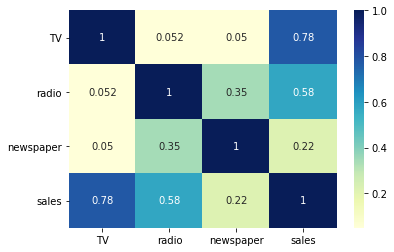

In [24]:
a=df.drop(['Unnamed: 0'],axis=1).corr()
sn.heatmap(a, cmap="YlGnBu", annot = True)

TV ads have maximum correlation with generating sales, followed by radio and newspaper. There does not exist any multicollinearity in the dataset.

# Model Building

In [25]:
x= df.iloc[:,1:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


We have stored our Feature variables in x

In [26]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

'y' contains our target variable.

In [27]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

We have standarized the input/feature variables.

In [28]:
scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 100)
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print("Predicted Values",pred_test)
print(r2_score(ytest,pred_test))

Predicted Values [21.93644696  6.03256783 13.20105913 21.04402429 16.83070284 12.96764926
 16.10447949 15.90507202 19.91784109 18.16962113 13.98614922  9.97341692
 12.62151432 16.08140254  5.35588839  8.14369491 17.08992978 12.25717594
 17.84742537  6.92105154 17.71068018 17.72937955 20.64995932 21.29472882
 23.37058202  9.44970795  7.70213193 14.62361154 18.80543561  9.66595601
 20.70211     9.41970006 10.31041334 15.45185354  7.71751342  8.39344532
 18.87066351 12.04390126  4.62492663 12.35055496 17.52160365 15.45605749
 13.14530854 13.46009112 12.94611348 21.51284959  3.24923523  9.76943932
 21.24165741  4.77459283 17.7601363  18.53067191  5.61212001  8.23548377
  4.96097109 12.52835768 10.26932653 11.41733002 16.87117313 15.00660778]
0.879333016002195


The r2 score of Linear Regression is 87.9%

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Importing few more libraries for more models.

In [31]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('DTC Score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('DTC r2_score:',r2_score(ytest,dtrpredict))

print("Mean squared error of DTC:",mean_squared_error(ytest,dtrpredict))
print("Root Mean Square error of DTC:",np.sqrt(mean_squared_error(ytest,dtrpredict)))

DTC Score: 1.0
DTC r2_score: 0.9322680809557153
Mean squared error of DTC: 1.9689999999999996
Root Mean Square error of DTC: 1.4032106042928836


The r2 score of 93.22%

In [32]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('SCORE:',knr.score(xtrain,ytrain))
knrpredict=knr.predict(xtest)
print("r2_score:",r2_score(ytest,knrpredict))
print("Mean Square Error:",mean_squared_error(ytest,knrpredict))
print("Root Mean Square:",np.sqrt(mean_squared_error(ytest,knrpredict)))

SCORE: 0.9606976535274077
r2_score: 0.926138153086903
Mean Square Error: 2.1471999999999998
Root Mean Square: 1.465332726721136


The r2 score of KNeighborsRegressor is 92.61%

In [33]:
svr = SVR()
svr.fit(xtrain,ytrain)
print('Score:',svr.score(xtrain,ytrain))
svrpredict=svr.predict(xtest)
print('r2_Score:',r2_score(ytest,svrpredict))
print("Mean Squared Error Of DTC:",mean_squared_error(ytest,svrpredict))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,svrpredict)))

Score: 0.9254676067061504
r2_Score: 0.8647367832352166
Mean Squared Error Of DTC: 3.9321678400360023
Root Mean Squared Error: 1.9829694501015396


The r2 Score of SVR is 86.47% 

In [34]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('SGD SCORE:',sgd.score(xtrain,ytrain))
sgdpredict=sgd.predict(xtest)
print('SGD r2_score:',r2_score(ytest,sgdpredict))
print('Mean squared Error:',mean_squared_error(ytest,sgdpredict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,sgdpredict)))

SGD SCORE: 0.9132222587515005
SGD r2_score: 0.8820054191437539
Mean squared Error: 3.4301601517306053
Root Mean Squared Error: 1.8520691541437122


The r2 score of SGD Regressor is 88.2%

# Cross value Score

In [35]:
from sklearn.model_selection import cross_val_score as cvs
print(cvs(lr,x,y,cv=5).mean())
print(cvs(dtr,x,y,cv=5).mean())
print(cvs(knr,x,y,cv=5).mean())
print(cvs(svr,x,y,cv=5).mean())
print(cvs(sgd,x,y,cv=5).mean())

0.895827096855507
0.9538348573238509
0.943486345366393
0.9202978192122426
0.8963002415668967


Here SGD regressor has the least difference between r2 score and cv score , Hence we will use this model for hyper tune parameter.

# Hyper Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l2', 'l1', 'elasticnet'],
            'alpha':[0.0001,0.001,0.01,0.1,1.0,10],
            'fit_intercept':[True,False],
            'max_iter':[10,100,1000,10000]}
gvc = GridSearchCV(sgd,parameter,cv=5)
gvc.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 100, 1000, 10000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

Printing all the parameters to tune

In [37]:
gvc.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'max_iter': 10000, 'penalty': 'l1'}

Getting all the best parameter to apply in our model

In [38]:
Advertisement_model = SGDRegressor(alpha=0.1,fit_intercept=True,max_iter=100,penalty='l1')
Advertisement_model.fit(xtrain,ytrain)
pred=Advertisement_model.predict(xtest)
accuracy=r2_score(ytest,pred)
print(accuracy*100)

88.34949573719291


We have applied the best Parameters and got 88.34% accuracy. 

# Model Saving

In [39]:
import pickle
filename = 'Advertisement.pkl'
pickle.dump(Advertisement_model,open(filename,'wb'))

Saving the best model 

# Conclusion

In [40]:
a= np.array(ytest)
predicted = np.array(sgd.predict(xtest))
Advertisement=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Advertisement

,Original,Predicted
0,24.7,21.771622
1,7.2,6.039859
2,11.7,13.288930
3,22.2,21.062138
4,15.9,16.770780
5,12.2,12.990346
6,15.9,16.121360
7,15.5,15.875463
8,21.2,19.891203
9,18.3,18.149291


We can see that our model is working fine , The predicted values are almost same as the original value.